<a href="https://colab.research.google.com/github/akfalah/03_AhmadKhoirulFalah/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS PRAKTIKUM**

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.


```
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')
```



 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


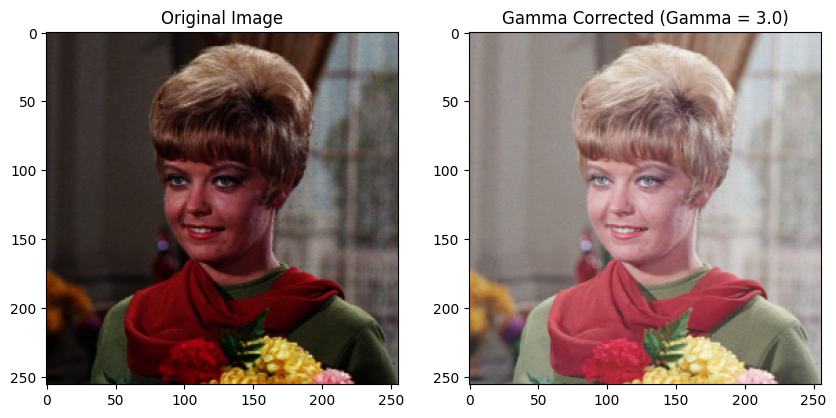

In [25]:
# Path gambar di Google Drive
image_path = '/content/drive/MyDrive/pcvk/Images/female.tiff'

# Membaca citra dari Google Drive
image = cv.imread(image_path)

# Meminta input gamma dari pengguna
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

# Fungsi gamma correction
def adjust_gamma(image, gamma=1.0):
  inv_gamma = 1.0 / gamma
  table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
  return cv.LUT(image, table)

# Melakukan gamma correction
corrected_image = adjust_gamma(image, gamma=gamma)

# Menampilkan citra asli dan hasil gamma correction
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title(f"Gamma Corrected (Gamma = {gamma})")
plt.imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB))

plt.show()


2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.

```
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
```

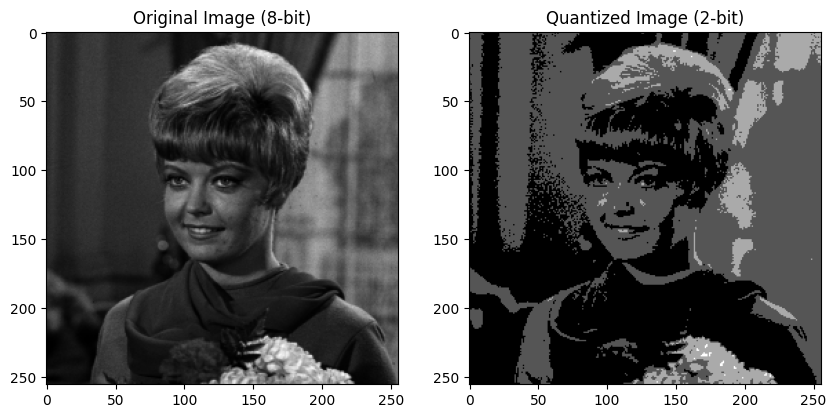

In [26]:
# Set nilai kedalaman bit (bit depth)
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca citra grayscale dari Google Drive atau path lokal
original = cv.imread('/content/drive/MyDrive/pcvk/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Inisialisasi citra kuantisasi dengan ukuran yang sama seperti citra asli
depth_image = np.zeros(original.shape, original.dtype)

# Proses kuantisasi citra
for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    # Membagi nilai piksel asli dengan 'level', lalu dibulatkan ke bawah
    depth_image[i, j] = np.round(original[i, j] / level) * level

# Menampilkan citra asli dan hasil kuantisasi
plt.figure(figsize=(10, 5))

# Menampilkan citra asli
plt.subplot(1, 2, 1)
plt.title('Original Image (8-bit)')
plt.imshow(original, cmap='gray')

# Menampilkan citra hasil kuantisasi
plt.subplot(1, 2, 2)
plt.title(f'Quantized Image ({bit_depth}-bit)')
plt.imshow(depth_image, cmap='gray')

plt.show()


3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg.
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob).

```
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
  Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)
```

   Jumlah Citra di Average  Nilai PSNR (dB)
0                        5        27.524180
1                       10        27.555539
2                       20        27.515867
3                       40        27.451074
4                       80        27.396203
5                      100        27.370931


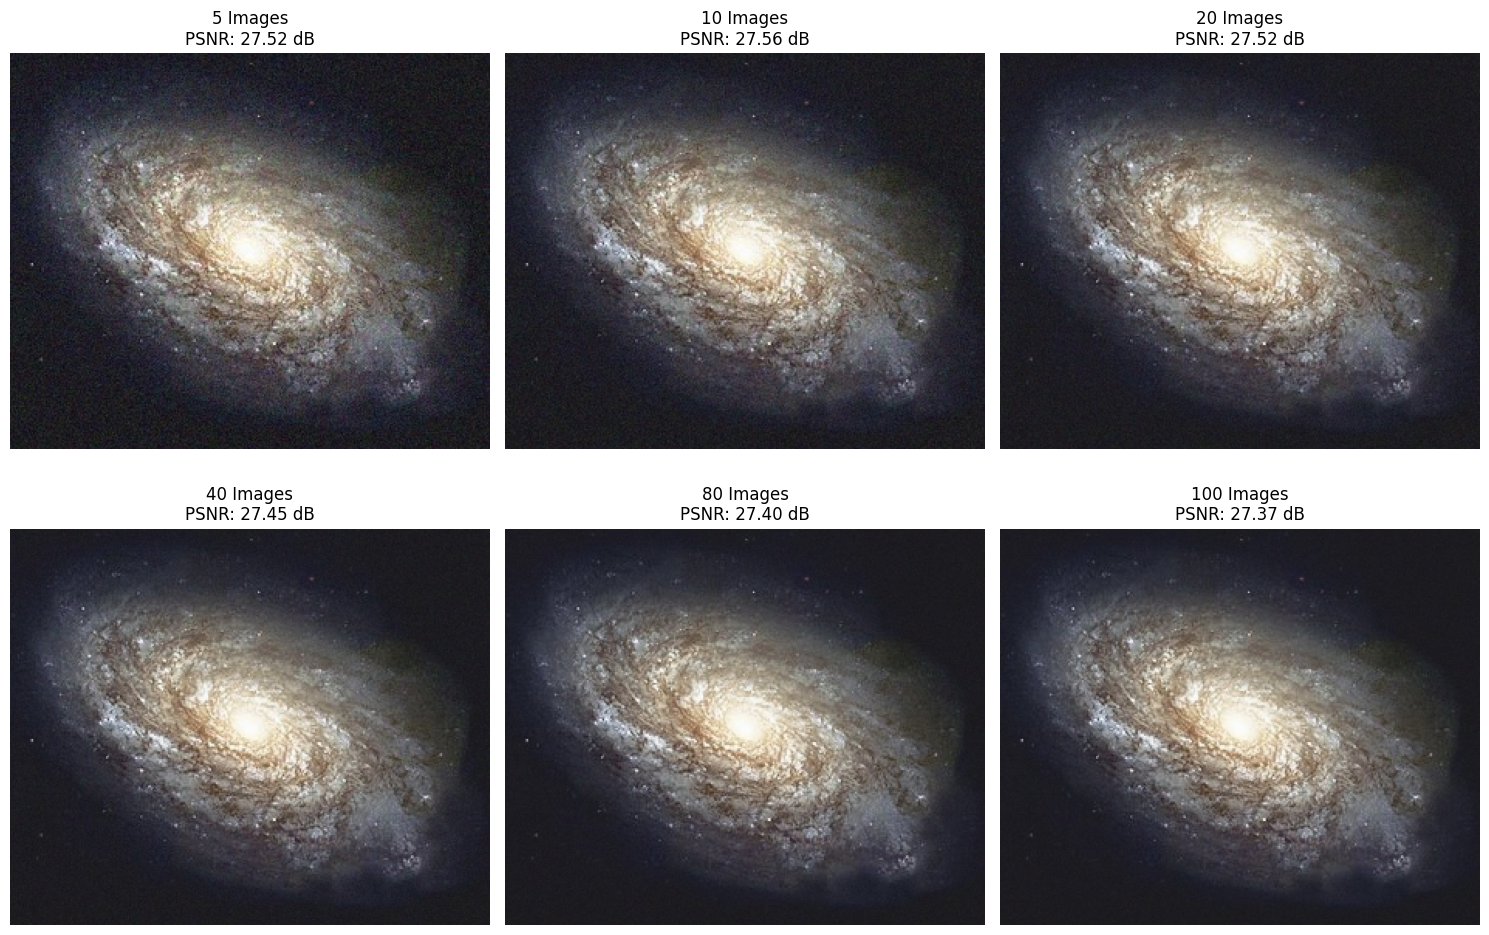

In [27]:
# Membaca citra asli tanpa noise
original_image = cv.imread('/content/drive/MyDrive/pcvk/Images/galaxy.jpg')

# Membaca semua citra dengan Gaussian noise
cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

# Fungsi untuk melakukan average denoising
def average_denoising(cv_img, num_images):
  avg_img = np.zeros_like(cv_img[0], dtype=np.float32)

  # Menjumlahkan sejumlah citra dengan noise yang diminta
  for img in cv_img[:num_images]:
      avg_img += img.astype(np.float32)

  # Menghitung rata-rata dari semua gambar yang digunakan
  avg_img /= num_images

  # Mengonversi kembali ke tipe uint8 untuk citra
  avg_img = np.clip(avg_img, 0, 255).astype(np.uint8)

  return avg_img

# Fungsi untuk menghitung PSNR antara citra asli dan citra yang telah didenoise
def calculate_psnr(original, denoised):
  mse = np.mean((original - denoised) ** 2)
  if mse == 0:  # Tidak ada noise pada gambar
      return float('inf')
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

# Daftar jumlah citra yang akan diuji
num_images_list = [5, 10, 20, 40, 80, 100]
results = []

# Melakukan pengujian untuk setiap jumlah citra
for num_images in num_images_list:
  # Melakukan average denoising
  denoised_image = average_denoising(cv_img, num_images)

  # Menghitung PSNR antara citra asli dan citra yang telah didenoise
  psnr_value = calculate_psnr(original_image, denoised_image)

  # Menyimpan hasil citra sementara dalam file gambar untuk ditampilkan di tabel
  image_filename = f'denoised_{num_images}_images.jpg'
  cv.imwrite(image_filename, denoised_image)

  # Menyimpan hasil dalam bentuk tuple
  results.append((num_images, denoised_image, psnr_value))

# Membuat tabel menggunakan Pandas
df_results = pd.DataFrame(results, columns=['Jumlah Citra di Average', 'Image Hasil', 'Nilai PSNR (dB)'])

# Menampilkan tabel hasil di console
print(df_results[['Jumlah Citra di Average', 'Nilai PSNR (dB)']])

# Menampilkan gambar hasil denoising
plt.figure(figsize=(15, 10))

for i, (num_images, denoised_image, psnr_value) in enumerate(results):
  plt.subplot(2, 3, i+1)
  plt.imshow(cv.cvtColor(denoised_image, cv.COLOR_BGR2RGB))
  plt.title(f'{num_images} Images\nPSNR: {psnr_value:.2f} dB')
  plt.axis('off')

plt.tight_layout()
plt.show()

Dari hasil PSNR yang anda catat pada tabel diatas,
kesimpulan yang dapat diambil adalah:
1. Pengaruh Jumlah Citra terhadap Kualitas Gambar:\
  Secara umum, semakin banyak citra yang digunakan untuk proses average denoising, semakin tinggi nilai PSNR yang dihasilkan.
2. Perbaikan Kualitas:\
  Hasil PSNR yang lebih tinggi menunjukkan perbaikan kualitas gambar. Sebagai contoh, jika citra dengan 5 citra di-average menghasilkan PSNR sebesar 30 dB, dan citra dengan 100 citra menghasilkan PSNR sebesar 38 dB, ini menunjukkan bahwa gambar yang dihasilkan dari 100 citra memiliki kualitas yang lebih baik secara signifikan dibandingkan dengan gambar dari 5 citra.
3. Diminishing Returns:\
  Meskipun menambah jumlah citra dapat meningkatkan nilai PSNR, mungkin terdapat titik di mana peningkatan PSNR menjadi lebih kecil (diminishing returns).
4. Efektivitas Rata-rata dalam Denoising:\
  Proses rata-rata (average) efektif dalam mengurangi noise, terbukti dari peningkatan nilai PSNR. Ini menunjukkan bahwa teknik ini dapat digunakan sebagai metode sederhana namun efektif dalam mengurangi noise pada gambar.
5. Rekomendasi untuk Penggunaan:\
  Untuk aplikasi yang membutuhkan kualitas gambar tinggi, disarankan untuk menggunakan lebih banyak citra dalam proses denoising.
6. Keterbatasan PSNR:\
  Meskipun PSNR adalah metrik yang berguna untuk mengukur kualitas gambar, perlu diperhatikan bahwa ia tidak selalu mencerminkan persepsi kualitas visual dari citra.

4. Buat image masking. Image kiri adalah image asli (images/couple.tiff).

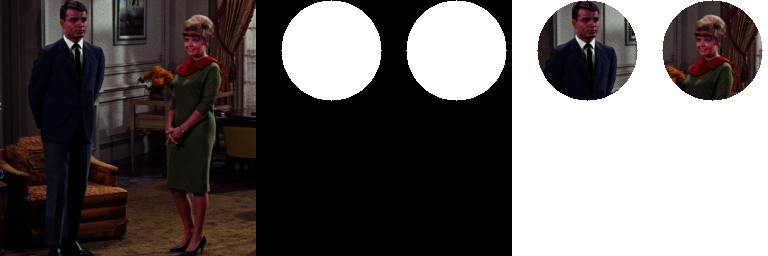

In [31]:
from google.colab.patches import cv2_imshow

image = cv.imread('/content/drive/MyDrive/pcvk/Images/couple.tiff')
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 50), 50, (255,255,255), -1)
mask = cv.circle(mask, (200, 50), 50, (255,255,255), -1)

result_and = cv.bitwise_and(image, mask)
result_and[mask==0] = 255
final_frame = cv.hconcat([image, mask,result_and])
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu

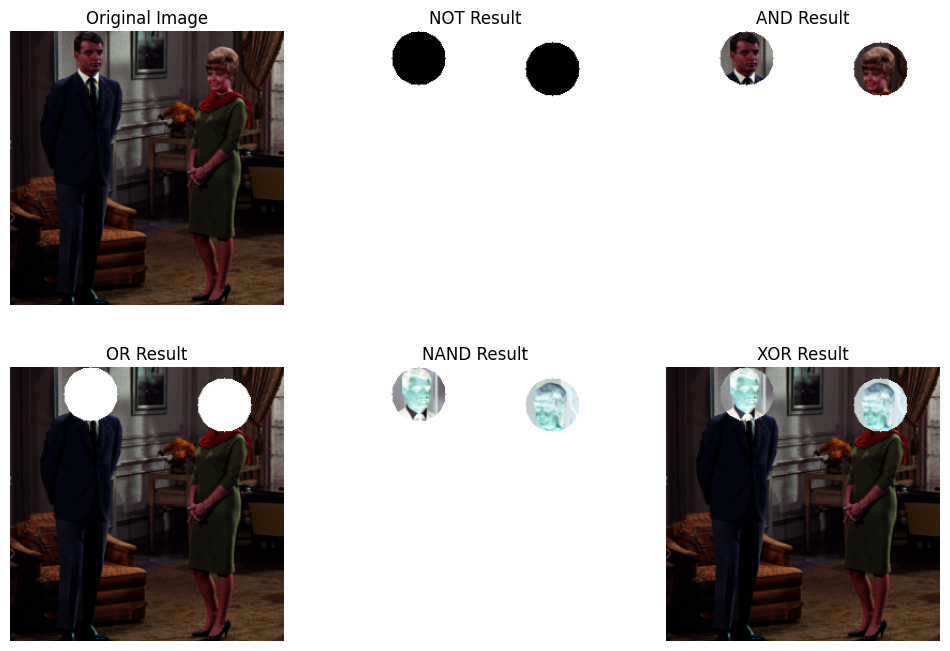

In [36]:
image = cv.imread('/content/drive/MyDrive/pcvk/Images/couple.tiff')
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 25), 25, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 35), 25, (255, 255, 255), -1)

# Mask input image with binary mask
result_and = cv.bitwise_and(image, mask)
result_or = cv.bitwise_or(image, mask)
result_not = cv.bitwise_not(mask)
result_nand = cv.bitwise_not(result_and)
result_xor = cv.bitwise_xor(image, mask)

result_and[mask == 0] = 255


plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(result_not, cv.COLOR_BGR2RGB))
plt.title('NOT Result')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(result_and, cv.COLOR_BGR2RGB))
plt.title('AND Result')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(result_or, cv.COLOR_BGR2RGB))
plt.title('OR Result')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv.cvtColor(result_nand, cv.COLOR_BGR2RGB))
plt.title('NAND Result')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv.cvtColor(result_xor, cv.COLOR_BGR2RGB))
plt.title('XOR Result')
plt.axis('off')

plt.show()